In [95]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tqdm import tqdm

In [96]:
# Nature reviews genetics > Journal Clubs 에서 데이터 가져오기
response = requests.get(
    'https://www.nature.com/nrg/articles?searchType=journalSearch&sort=PubDate&type=journal-club&page=1'
    )
bs = BeautifulSoup(response.text, 'lxml')

In [97]:
bs

<!DOCTYPE html>
<html class="grade-c" lang="en">
<head>
<title> 
    Journal Clubs
  | Nature Reviews Genetics</title>
<link as="font" crossorigin="" href="/static/fonts/HardingText-Regular-Web-cecd90984f.woff2" rel="preload" type="font/woff2"/>
<link crossorigin="" href="https://push-content.springernature.io" rel="preconnect"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="pc,mobile" name="applicable-device"/>
<meta content="width=device-width,initial-scale=1.0,maximum-scale=5,user-scalable=yes" name="viewport"/>
<script data-test="dataLayer">
    window.dataLayer = [{"content":{"category":{"contentType":null,"legacy":null},"article":null,"attributes":{"cms":null,"deliveryPlatform":null,"copyright":null},"contentInfo":null,"journal":{"pcode":"nrg","title":"Nature Reviews Genetics","volume":null,"issue":null},"authorization":{"status":true},"features":[],"collection":null},"page":{"category":{"pageType":"journal-articles"},"attributes":{"template":"mosaic","fea

In [98]:
bs.select('body div section div ul')
# /html/body/div[2]/section/div/ul

[<ul class="c-facet-expander__list">
 <li class="c-facet-expander__list-item">
 <a class="c-facet-expander__link" data-track="click" data-track-action="clear facets" data-track-label="link" href="?">All</a>
 </li>
 <li class="c-facet-expander__list-item">
 <span>Journal Club (33)</span>
 </li>
 </ul>,
 <ul class="c-facet-expander__list">
 <li class="c-facet-expander__list-item">
 <span>All</span>
 </li>
 <li class="c-facet-expander__list-item">
 <a class="c-facet-expander__link" data-track="click" data-track-action="select facet" data-track-label="link" href="?type=journal-club&amp;year=2023">2023 (7)</a>
 </li>
 <li class="c-facet-expander__list-item">
 <a class="c-facet-expander__link" data-track="click" data-track-action="select facet" data-track-label="link" href="?type=journal-club&amp;year=2022">2022 (18)</a>
 </li>
 <li class="c-facet-expander__list-item">
 <a class="c-facet-expander__link" data-track="click" data-track-action="select facet" data-track-label="link" href="?type=j

In [99]:
raw_data = bs.select('body div div ul li div article div div h3 a')

In [100]:
len(raw_data)

20

In [101]:
bs.select('body div div ul li div article div div h3 a')[0]

<a class="c-card__link u-link-inherit" data-track="click" data-track-action="view article" data-track-label="link" href="/articles/s41576-023-00585-x" itemprop="url">Understanding soft sweeps: a signature of rapid adaptation</a>

In [102]:
# Paper title
# X-Path : /html/body/div[2]/section/div/ul/li[1]/div/article/div[1]/div/h3/a/text()
bs.select('body div div ul li div article div div h3 a')[0].text

'Understanding soft sweeps: a signature of rapid adaptation'

In [103]:
# Paper title
# X-Path : /html/body/div[2]/section/div/ul/li[1]/div/article/div[1]/div/h3/a/text()
title_raw_data = bs.select('body div div ul li div article div div h3 a')
titles = [bs.select('body div div ul li div article div div h3 a')[i].text for i in range(len(title_raw_data))]

In [104]:
# Paper date
# X-Path : /html/body/div[2]/section/div/ul/li[1]/div/article/div[2]/time
date_raw_data = bs.select('body div div ul li div article div time')
dates = [bs.select('body div div ul li div article div time')[i].text for i in range(len(date_raw_data))]

In [105]:
nrg_jc = pd.DataFrame({
    'title' : titles,
    'date' : dates
})

In [106]:
nrg_jc

,title,date
0,Understanding soft sweeps: a signature of rapi...,17 Feb 2023
1,Regulatory promoter architectures in the hands...,06 Feb 2023
2,Chromatin organization in red triangles,02 Feb 2023
3,How Hi-C ignited the era of 3D genome biology,02 Feb 2023
4,Stem cell-derived organoid models: defying the...,25 Jan 2023
5,Advances of aneuploidy research in the materna...,12 Jan 2023
6,Down memory lane — unravelling the puzzle of g...,12 Jan 2023
7,What’s my age again?,06 Dec 2022
8,The Neanderthal inside us,05 Dec 2022
9,Live long & prosper: evidence of evolutionary ...,02 Dec 2022


In [107]:
import numpy as np
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image

In [108]:
import re

In [109]:
splitted_titles = [re.split('\s', title) for title in titles]
splitted_titles

[['Understanding',
  'soft',
  'sweeps:',
  'a',
  'signature',
  'of',
  'rapid',
  'adaptation'],
 ['Regulatory',
  'promoter',
  'architectures',
  'in',
  'the',
  'hands',
  'of',
  'thermodynamic',
  'modelling'],
 ['Chromatin', 'organization', 'in', 'red', 'triangles'],
 ['How', 'Hi-C', 'ignited', 'the', 'era', 'of', '3D', 'genome', 'biology'],
 ['Stem',
  'cell-derived',
  'organoid',
  'models:',
  'defying',
  'the',
  'Hayflick',
  'limit'],
 ['Advances',
  'of',
  'aneuploidy',
  'research',
  'in',
  'the',
  'maternal',
  'germline'],
 ['Down',
  'memory',
  'lane',
  '—',
  'unravelling',
  'the',
  'puzzle',
  'of',
  'gene',
  'regulation'],
 ['What’s', 'my', 'age', 'again?'],
 ['The', 'Neanderthal', 'inside', 'us'],
 ['Live',
  'long',
  '&',
  'prosper:',
  'evidence',
  'of',
  'evolutionary',
  'forces',
  'on',
  'lifespan'],
 ['The', 'mutation', 'rate', 'as', 'an', 'evolving', 'trait'],
 ['The',
  'gene',
  'variant',
  'that',
  'helped',
  'put',
  'Latinxs',
 

In [110]:
import itertools

In [111]:
title_words = list(itertools.chain(*splitted_titles))
title_words

['Understanding',
 'soft',
 'sweeps:',
 'a',
 'signature',
 'of',
 'rapid',
 'adaptation',
 'Regulatory',
 'promoter',
 'architectures',
 'in',
 'the',
 'hands',
 'of',
 'thermodynamic',
 'modelling',
 'Chromatin',
 'organization',
 'in',
 'red',
 'triangles',
 'How',
 'Hi-C',
 'ignited',
 'the',
 'era',
 'of',
 '3D',
 'genome',
 'biology',
 'Stem',
 'cell-derived',
 'organoid',
 'models:',
 'defying',
 'the',
 'Hayflick',
 'limit',
 'Advances',
 'of',
 'aneuploidy',
 'research',
 'in',
 'the',
 'maternal',
 'germline',
 'Down',
 'memory',
 'lane',
 '—',
 'unravelling',
 'the',
 'puzzle',
 'of',
 'gene',
 'regulation',
 'What’s',
 'my',
 'age',
 'again?',
 'The',
 'Neanderthal',
 'inside',
 'us',
 'Live',
 'long',
 '&',
 'prosper:',
 'evidence',
 'of',
 'evolutionary',
 'forces',
 'on',
 'lifespan',
 'The',
 'mutation',
 'rate',
 'as',
 'an',
 'evolving',
 'trait',
 'The',
 'gene',
 'variant',
 'that',
 'helped',
 'put',
 'Latinxs',
 'in',
 'the',
 '1000',
 'genomes',
 'project',
 'Dyn

In [112]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt

(-0.5, 399.5, 199.5, -0.5)

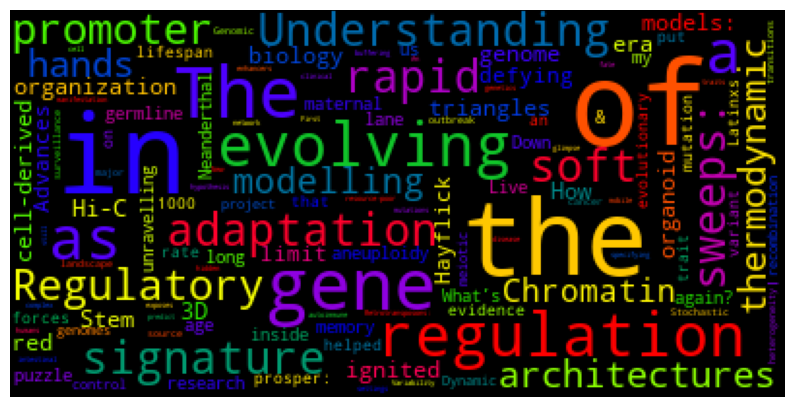

In [113]:
counter = Counter(title_words)

word_cloud = WordCloud(
    background_color="black", 
    max_font_size=60,
    colormap='prism'
    ).generate_from_frequencies(counter)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud)
plt.axis('off')

In [114]:
!pip install nltk

Defaulting to user installation because normal site-packages is not writeable


You should consider upgrading via the 'C:\Program Files\Python39\python.exe -m pip install --upgrade pip' command.


In [115]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize, WordPunctTokenizer, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tag import pos_tag

In [82]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [83]:
nltk.download('popular')
#nltk.word_tokenizer
#nltk.pos_tag
# 명사 단어 뽑고, 명사 단어에 붙은 수식어까지 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\최예름\AppData\Roaming\nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\

True

In [116]:
text = 'Regulatory promoter architectures in the hands of thermodynamic modelling'

In [117]:
import nltk
result = nltk.word_tokenize(text)
result2 = nltk.pos_tag(result)
result2

[('Regulatory', 'NNP'),
 ('promoter', 'NN'),
 ('architectures', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('hands', 'NNS'),
 ('of', 'IN'),
 ('thermodynamic', 'JJ'),
 ('modelling', 'NN')]

In [118]:
for i in range(len(result2)):
    if result2[i][1].startswith('N') or result2[i][1].startswith('J'):
        print(result2[i][0])

Regulatory
promoter
architectures
hands
thermodynamic
modelling


In [119]:
import nltk
title_words_wordtype = nltk.pos_tag(title_words)
title_words_wordtype

[('Understanding', 'VBG'),
 ('soft', 'JJ'),
 ('sweeps:', 'NN'),
 ('a', 'DT'),
 ('signature', 'NN'),
 ('of', 'IN'),
 ('rapid', 'JJ'),
 ('adaptation', 'NN'),
 ('Regulatory', 'NNP'),
 ('promoter', 'NN'),
 ('architectures', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('hands', 'NNS'),
 ('of', 'IN'),
 ('thermodynamic', 'JJ'),
 ('modelling', 'NN'),
 ('Chromatin', 'NNP'),
 ('organization', 'NN'),
 ('in', 'IN'),
 ('red', 'JJ'),
 ('triangles', 'NNS'),
 ('How', 'WRB'),
 ('Hi-C', 'NNP'),
 ('ignited', 'VBD'),
 ('the', 'DT'),
 ('era', 'NN'),
 ('of', 'IN'),
 ('3D', 'CD'),
 ('genome', 'JJ'),
 ('biology', 'NN'),
 ('Stem', 'NNP'),
 ('cell-derived', 'JJ'),
 ('organoid', 'NN'),
 ('models:', 'NN'),
 ('defying', 'VBG'),
 ('the', 'DT'),
 ('Hayflick', 'NNP'),
 ('limit', 'NN'),
 ('Advances', 'NNS'),
 ('of', 'IN'),
 ('aneuploidy', 'JJ'),
 ('research', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('maternal', 'JJ'),
 ('germline', 'NN'),
 ('Down', 'NNP'),
 ('memory', 'NN'),
 ('lane', 'NN'),
 ('—', 'NNP'),
 ('unravelling',

In [149]:
word_list = [title_words_wordtype[i][0] for i in range(len(title_words_wordtype)) if title_words_wordtype[i][1].startswith('N') or title_words_wordtype[i][1].startswith('J')]
word_list

['soft',
 'sweeps:',
 'signature',
 'rapid',
 'adaptation',
 'Regulatory',
 'promoter',
 'architectures',
 'hands',
 'thermodynamic',
 'modelling',
 'Chromatin',
 'organization',
 'red',
 'triangles',
 'Hi-C',
 'era',
 'genome',
 'biology',
 'Stem',
 'cell-derived',
 'organoid',
 'models:',
 'Hayflick',
 'limit',
 'Advances',
 'aneuploidy',
 'research',
 'maternal',
 'germline',
 'Down',
 'memory',
 'lane',
 '—',
 'puzzle',
 'gene',
 'regulation',
 'What’s',
 'age',
 'Neanderthal',
 'Live',
 'prosper:',
 'evidence',
 'evolutionary',
 'forces',
 'mutation',
 'rate',
 'trait',
 'gene',
 'variant',
 'Latinxs',
 'genomes',
 'project',
 'Dynamic',
 'control',
 'meiotic',
 'recombination',
 'landscape',
 'Stochastic',
 'transitions',
 'major',
 'source',
 'cancer',
 'heterogeneity',
 'Genomic',
 'outbreak',
 'surveillance',
 'resource-poor',
 'settings',
 'Variability',
 'hidden',
 'buffering',
 'network',
 'intestinal',
 'cell',
 'fate',
 'First',
 'glimpse',
 'enhancers',
 'gene',
 'regula

In [150]:
remove_words = ['soft', 'sweeps:', 'rapid', 'adaptation',  'Regulatory', 'promoter',
'architectures', 'thermodynamic', 'modelling', 'Chromatin', 'organization',
'red', 'triangles', '3D', 'genome', 'biology', 'Stem', 'cell-derived', 'organoid',
'Hayflick', 'limit', 'maternal', 'germline', 'Down', 'memory', 'lane',
'gene', 'regulation', 'evidence', 'evolutionary', 'forces', 'mutation', 'rate', 
'trait', 'gene', 'variant', 'genomes', 'project', 'Dynamic', 'control',
'meiotic', 'recombination', 'Stochastic', 'transitions', 'cancer', 'heterogeneity',
'hidden', 'buffering', 'intestinal', 'cell', 'fate', 'gene', 'regulation',
'clinical', 'manifestation', 'complex', 'traits', 'autoimmune', 'disease', 'genetics',
'Retrotransposons:', 'prosper:', '—', 'models:']
for remove_word in remove_words:
    try:
        word_list.remove(remove_word)
    except ValueError:
        pass
append_words = ['soft sweeps', 'rapid adaptation', 'Regulatory promoter architectures',
                'thermodynamic modelling', 'Chromatin organization',
                'red triangles', '3D genome biology', 'Stem cell-derived organoid',
                'Hayflick limit', 'maternal germline', 'Down memory lane', 
                'gene regulation', 'evidence of evolutionary forces', 
                'mutation rate', 'evolving trait', 'gene variant', 
                '1000 genomes project', 'Dynamic control', 'meiotic recombination',
                'Stochastic transitions', 'cancer heterogeneity', 'hidden buffering', 
                'intestinal cell fate', 'gene regulation', 'clinical manifestation',
                'complex traits', 'autoimmune disease genetics', 'Retrotransposons',
                'prosper', 'models']
for append_word in append_words:
    try:
        word_list.append(append_word)
    except ValueError:
        pass


In [151]:
word_list

['signature',
 'hands',
 'Hi-C',
 'era',
 'Advances',
 'aneuploidy',
 'research',
 'puzzle',
 'What’s',
 'age',
 'Neanderthal',
 'Live',
 'Latinxs',
 'landscape',
 'major',
 'source',
 'Genomic',
 'outbreak',
 'surveillance',
 'resource-poor',
 'settings',
 'Variability',
 'network',
 'First',
 'glimpse',
 'enhancers',
 'New',
 'mutations',
 'hypothesis',
 'humans',
 'soft sweeps',
 'rapid adaptation',
 'Regulatory promoter architectures',
 'thermodynamic modelling',
 'Chromatin organization',
 'red triangles',
 '3D genome biology',
 'Stem cell-derived organoid',
 'Hayflick limit',
 'maternal germline',
 'Down memory lane',
 'gene regulation',
 'evidence of evolutionary forces',
 'mutation rate',
 'evolving trait',
 'gene variant',
 '1000 genomes project',
 'Dynamic control',
 'meiotic recombination',
 'Stochastic transitions',
 'cancer heterogeneity',
 'hidden buffering',
 'intestinal cell fate',
 'gene regulation',
 'clinical manifestation',
 'complex traits',
 'autoimmune disease ge

(-0.5, 399.5, 199.5, -0.5)

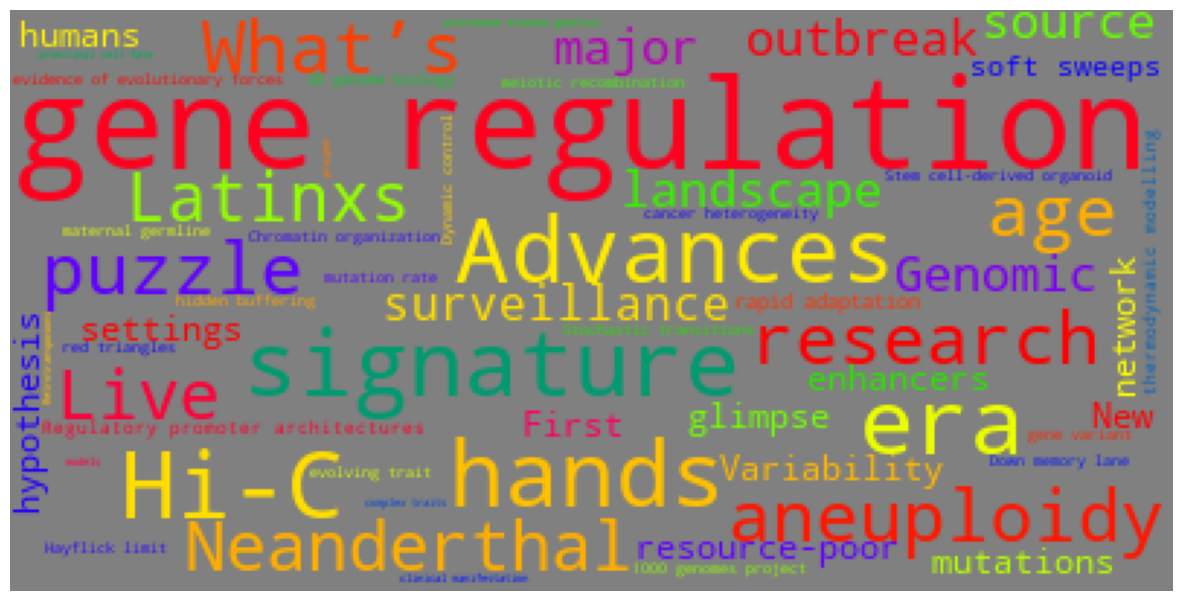

In [161]:
counter = Counter(word_list)

word_cloud = WordCloud(
    background_color="grey", 
    max_font_size=50,
    colormap='prism'
    ).generate_from_frequencies(counter)

plt.figure(figsize=(15, 10))
plt.imshow(word_cloud)
plt.axis('off')